# Task 5: Personal Loan Acceptance Prediction
**DevelopersHub Corporation — Data Science & Analytics Internship**

---

## 1. Introduction & Problem Statement

Banks regularly run marketing campaigns to offer personal loans to existing customers. Targeting the right customers increases conversion rates and reduces marketing costs.

**Objective:** Predict which customers are likely to accept a personal loan offer based on demographic and financial attributes such as age, job, marital status, education, and account balance.

**Dataset:** Bank Marketing Dataset (UCI Machine Learning Repository) — contains records of bank customers who were contacted during a marketing campaign, along with whether they subscribed to a term deposit (the target variable).

**Model Used:** Decision Tree Classifier — easy to interpret, handles categorical features well, and provides clear decision rules for business insight.

**Evaluation Metrics:** Accuracy, Confusion Matrix, and Classification Report (Precision, Recall, F1-Score).

---
## 3. Import Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, ConfusionMatrixDisplay
)

# Display settings
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.dpi'] = 120

print('All libraries imported successfully!')

All libraries imported successfully!


---
## 4. Load & Understand the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('/content/bank.csv')

print('Shape of dataset:', df.shape)
print('\nColumn names:')
print(df.columns.tolist())
print('\nFirst 5 rows:')
df.head()

Shape of dataset: (11162, 17)

Column names:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# Dataset info — data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
# Statistical summary
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

# Target variable distribution
print('\nLoan Acceptance Distribution (Target: deposit):')
print(df['deposit'].value_counts())
print(f'\nAcceptance Rate: {(df["deposit"] == "yes").mean()*100:.2f}%')

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Loan Acceptance Distribution (Target: deposit):
deposit
no     5873
yes    5289
Name: count, dtype: int64

Acceptance Rate: 47.38%


---
## 5. Data Cleaning & Preparation

In [6]:
# Check unique values in categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print('Categorical columns and their unique values:')
for col in cat_cols:
    print(f'  {col}: {df[col].unique()}')

Categorical columns and their unique values:
  job: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
  marital: ['married' 'single' 'divorced']
  education: ['secondary' 'tertiary' 'primary' 'unknown']
  default: ['no' 'yes']
  housing: ['yes' 'no']
  loan: ['no' 'yes']
  contact: ['unknown' 'cellular' 'telephone']
  month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
  poutcome: ['unknown' 'other' 'failure' 'success']
  deposit: ['yes' 'no']


In [7]:
# Encode all categorical columns using Label Encoding
df_clean = df.copy()
le = LabelEncoder()

for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

print('All categorical columns encoded.')
print('\nEncoded dataset preview:')
df_clean.head()

All categorical columns encoded.

Encoded dataset preview:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


---
## 6. Exploratory Data Analysis (EDA)

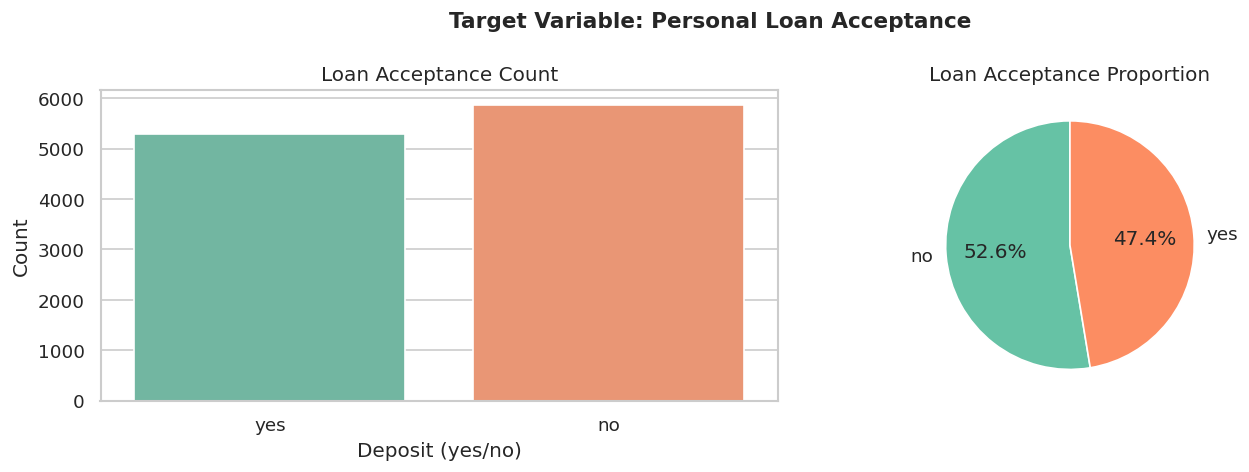

In [8]:
# --- Plot 1: Loan Acceptance Distribution ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='deposit', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Loan Acceptance Count')
axes[0].set_xlabel('Deposit (yes/no)')
axes[0].set_ylabel('Count')

deposit_counts = df['deposit'].value_counts()
axes[1].pie(deposit_counts, labels=deposit_counts.index,
            autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=90)
axes[1].set_title('Loan Acceptance Proportion')

plt.suptitle('Target Variable: Personal Loan Acceptance', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

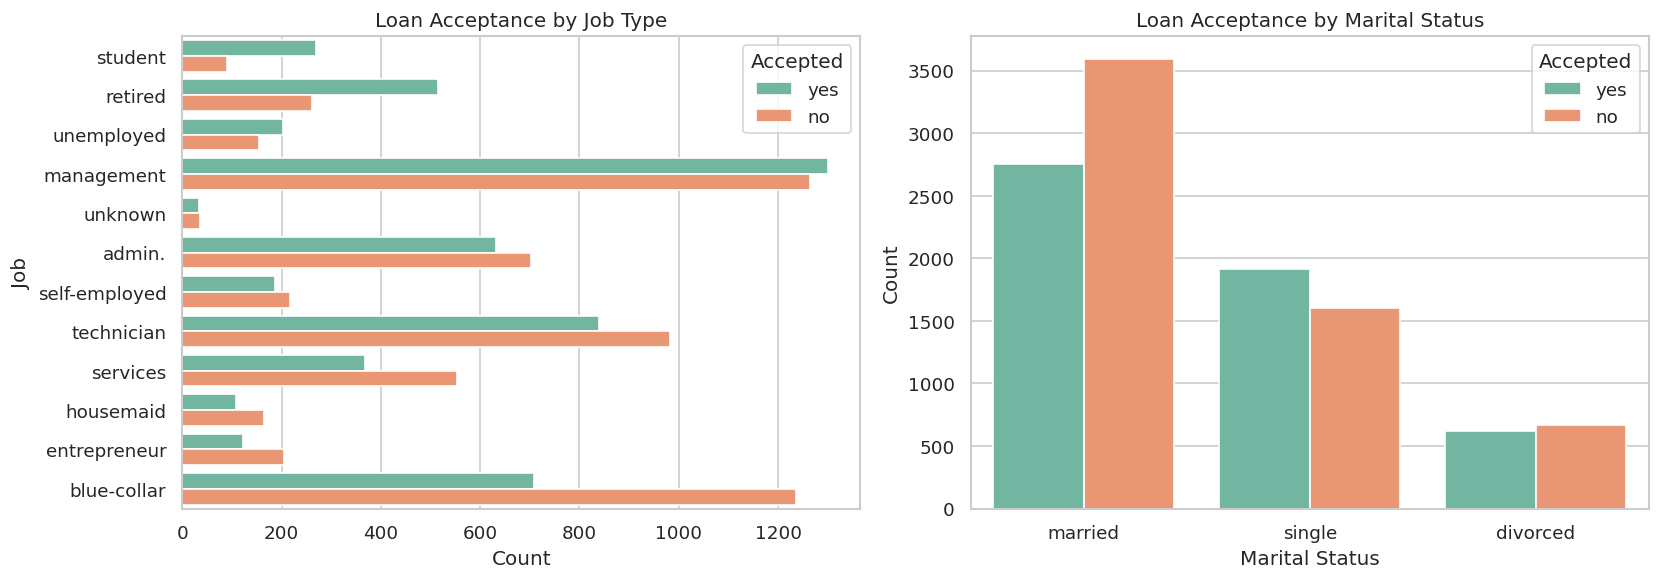

In [9]:
# --- Plot 2: Loan Acceptance by Job and Marital Status ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Job vs Deposit
job_order = df.groupby('job')['deposit'].apply(
    lambda x: (x == 'yes').mean()
).sort_values(ascending=False).index

sns.countplot(y='job', hue='deposit', data=df,
              order=job_order, palette='Set2', ax=axes[0])
axes[0].set_title('Loan Acceptance by Job Type')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Job')
axes[0].legend(title='Accepted')

# Marital Status vs Deposit
sns.countplot(x='marital', hue='deposit', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Loan Acceptance by Marital Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Count')
axes[1].legend(title='Accepted')

plt.tight_layout()
plt.show()

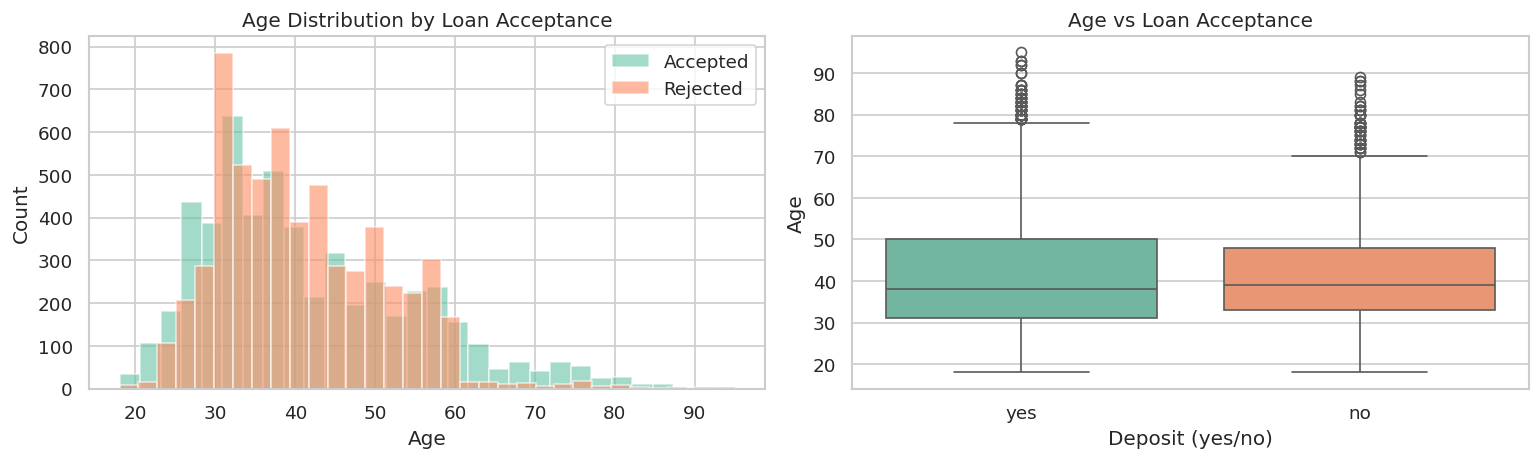

In [10]:
# --- Plot 3: Age Distribution by Loan Acceptance ---
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Histogram
df[df['deposit'] == 'yes']['age'].hist(alpha=0.6, color='#66c2a5', bins=30, ax=axes[0], label='Accepted')
df[df['deposit'] == 'no']['age'].hist(alpha=0.6, color='#fc8d62', bins=30, ax=axes[0], label='Rejected')
axes[0].set_title('Age Distribution by Loan Acceptance')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend()

# Box plot
sns.boxplot(x='deposit', y='age', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Age vs Loan Acceptance')
axes[1].set_xlabel('Deposit (yes/no)')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

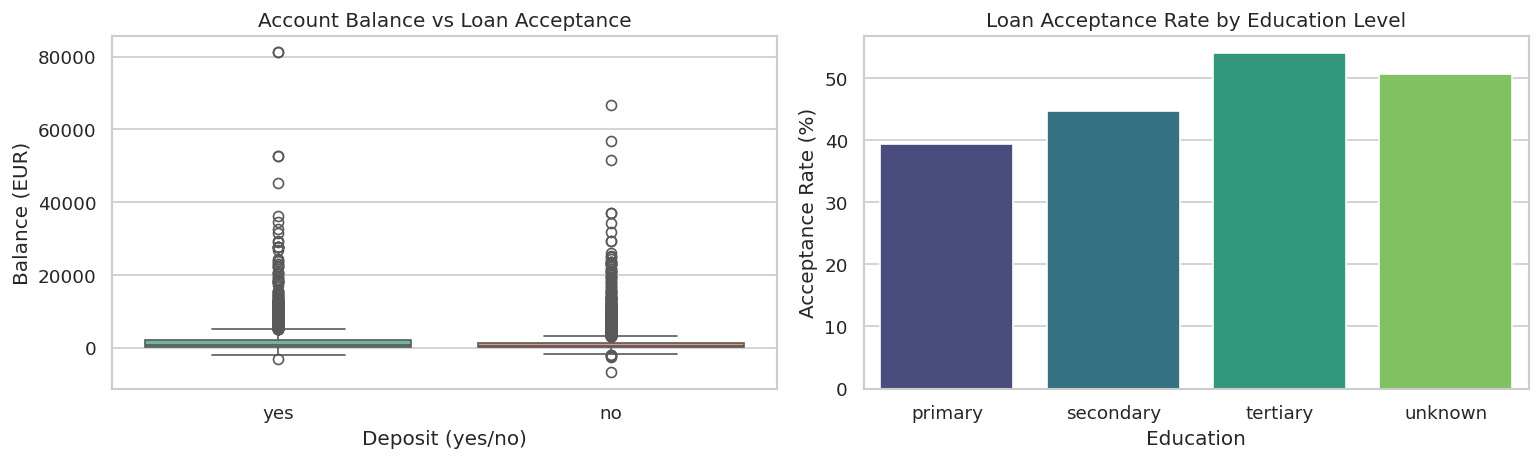

In [11]:
# --- Plot 4: Balance by Loan Acceptance ---
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

sns.boxplot(x='deposit', y='balance', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Account Balance vs Loan Acceptance')
axes[0].set_xlabel('Deposit (yes/no)')
axes[0].set_ylabel('Balance (EUR)')

# Education vs Acceptance rate
edu_rate = df.groupby('education')['deposit'].apply(
    lambda x: (x == 'yes').mean() * 100
).reset_index()
edu_rate.columns = ['education', 'acceptance_rate']
sns.barplot(x='education', y='acceptance_rate', data=edu_rate, palette='viridis', ax=axes[1])
axes[1].set_title('Loan Acceptance Rate by Education Level')
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Acceptance Rate (%)')

plt.tight_layout()
plt.show()

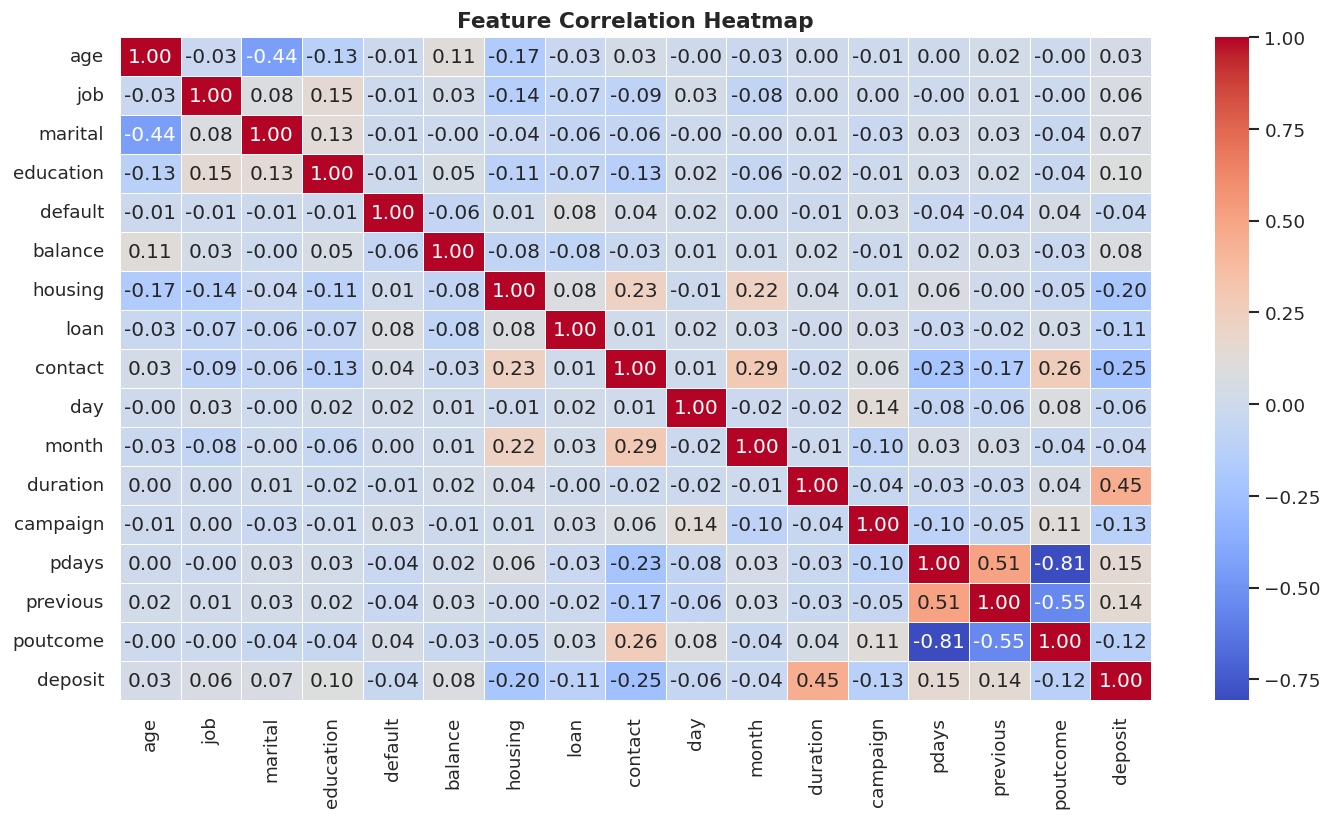

In [12]:
# --- Plot 5: Correlation Heatmap ---
plt.figure(figsize=(12, 7))
corr = df_clean.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 7. Model Training — Decision Tree Classifier

In [13]:
# Separate features (X) and target variable (y)
X = df_clean.drop(columns=['deposit'])
y = df_clean['deposit']

print('Feature matrix shape:', X.shape)
print('Target vector shape:', y.shape)
print('\nFeatures used:')
print(X.columns.tolist())

Feature matrix shape: (11162, 16)
Target vector shape: (11162,)

Features used:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [14]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size:  {X_test.shape[0]} samples')

Training set size: 8929 samples
Testing set size:  2233 samples


In [15]:
# Train the Decision Tree Classifier
# max_depth=5: limits tree depth to prevent overfitting and keep it interpretable
# criterion='gini': uses Gini impurity to measure split quality
# random_state=42: ensures reproducibility

dt_model = DecisionTreeClassifier(
    max_depth=5,
    criterion='gini',
    random_state=42,
    class_weight='balanced'   # handles class imbalance
)

dt_model.fit(X_train, y_train)
print('Decision Tree model trained successfully!')

Decision Tree model trained successfully!


---
## 8. Model Evaluation

In [16]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Detailed Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Accepted']))

Model Accuracy: 79.94%

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.84      0.76      0.80      1175
    Accepted       0.76      0.84      0.80      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



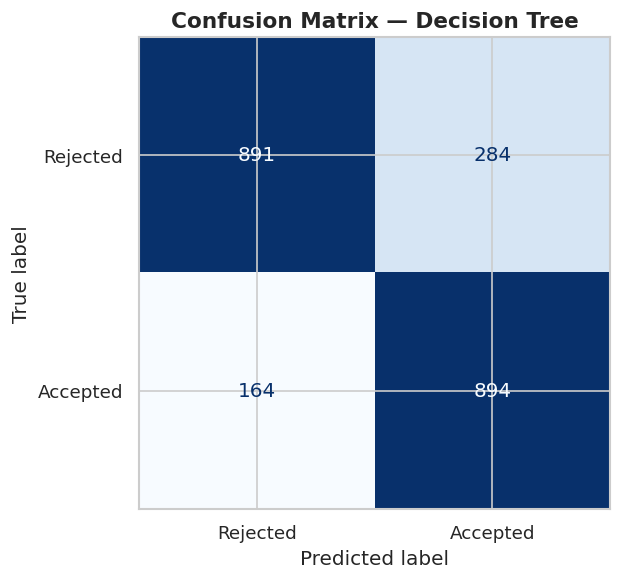


True Negatives  (Correctly predicted Rejected):  891
True Positives  (Correctly predicted Accepted):  894
False Positives (Predicted Accepted, actually Rejected): 284
False Negatives (Predicted Rejected, actually Accepted): 164


In [17]:
# --- Confusion Matrix ---
fig, ax = plt.subplots(figsize=(6, 5))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Accepted'])
disp.plot(ax=ax, colorbar=False, cmap='Blues')

ax.set_title('Confusion Matrix — Decision Tree', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f'\nTrue Negatives  (Correctly predicted Rejected):  {tn}')
print(f'True Positives  (Correctly predicted Accepted):  {tp}')
print(f'False Positives (Predicted Accepted, actually Rejected): {fp}')
print(f'False Negatives (Predicted Rejected, actually Accepted): {fn}')

---
## 9. Feature Importance & Business Insight

In [18]:
# Extract and display feature importances
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print('Feature Importances (sorted):')
feat_df

Feature Importances (sorted):


,Feature,Importance
11,duration,0.634206
8,contact,0.137615
13,pdays,0.051437
10,month,0.047823
15,poutcome,0.041141
6,housing,0.041046
14,previous,0.040809
5,balance,0.002549
0,age,0.001883
12,campaign,0.001491


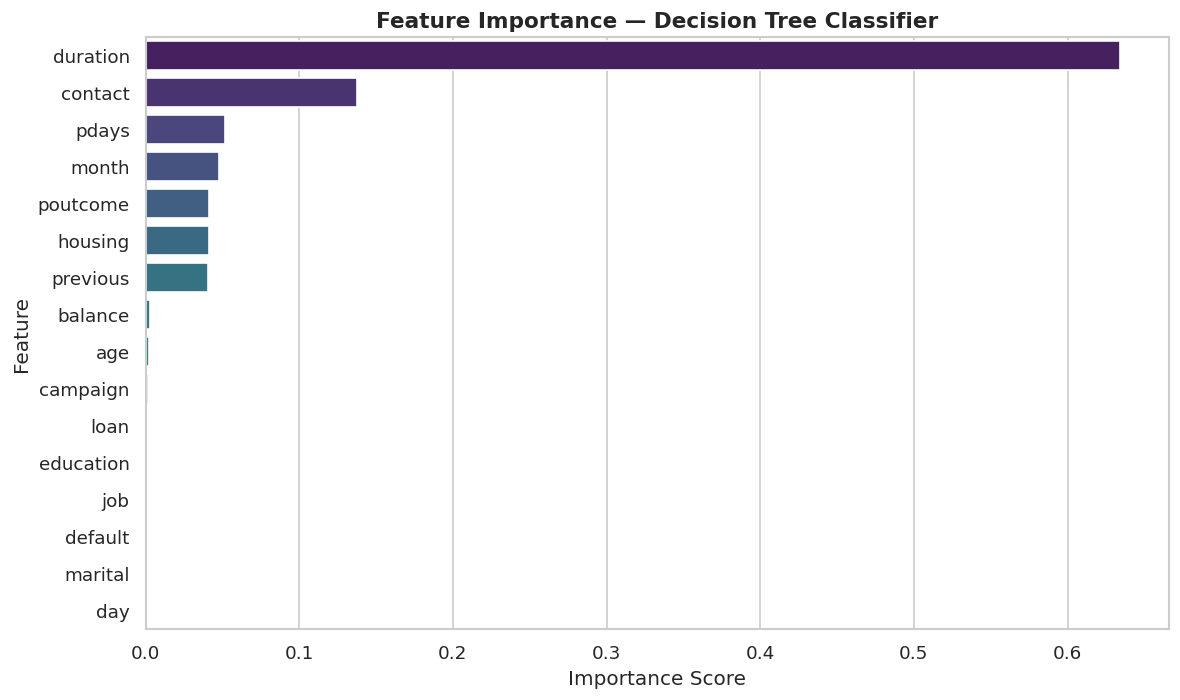

In [19]:
# --- Plot: Feature Importance Bar Chart ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance — Decision Tree Classifier', fontsize=13, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

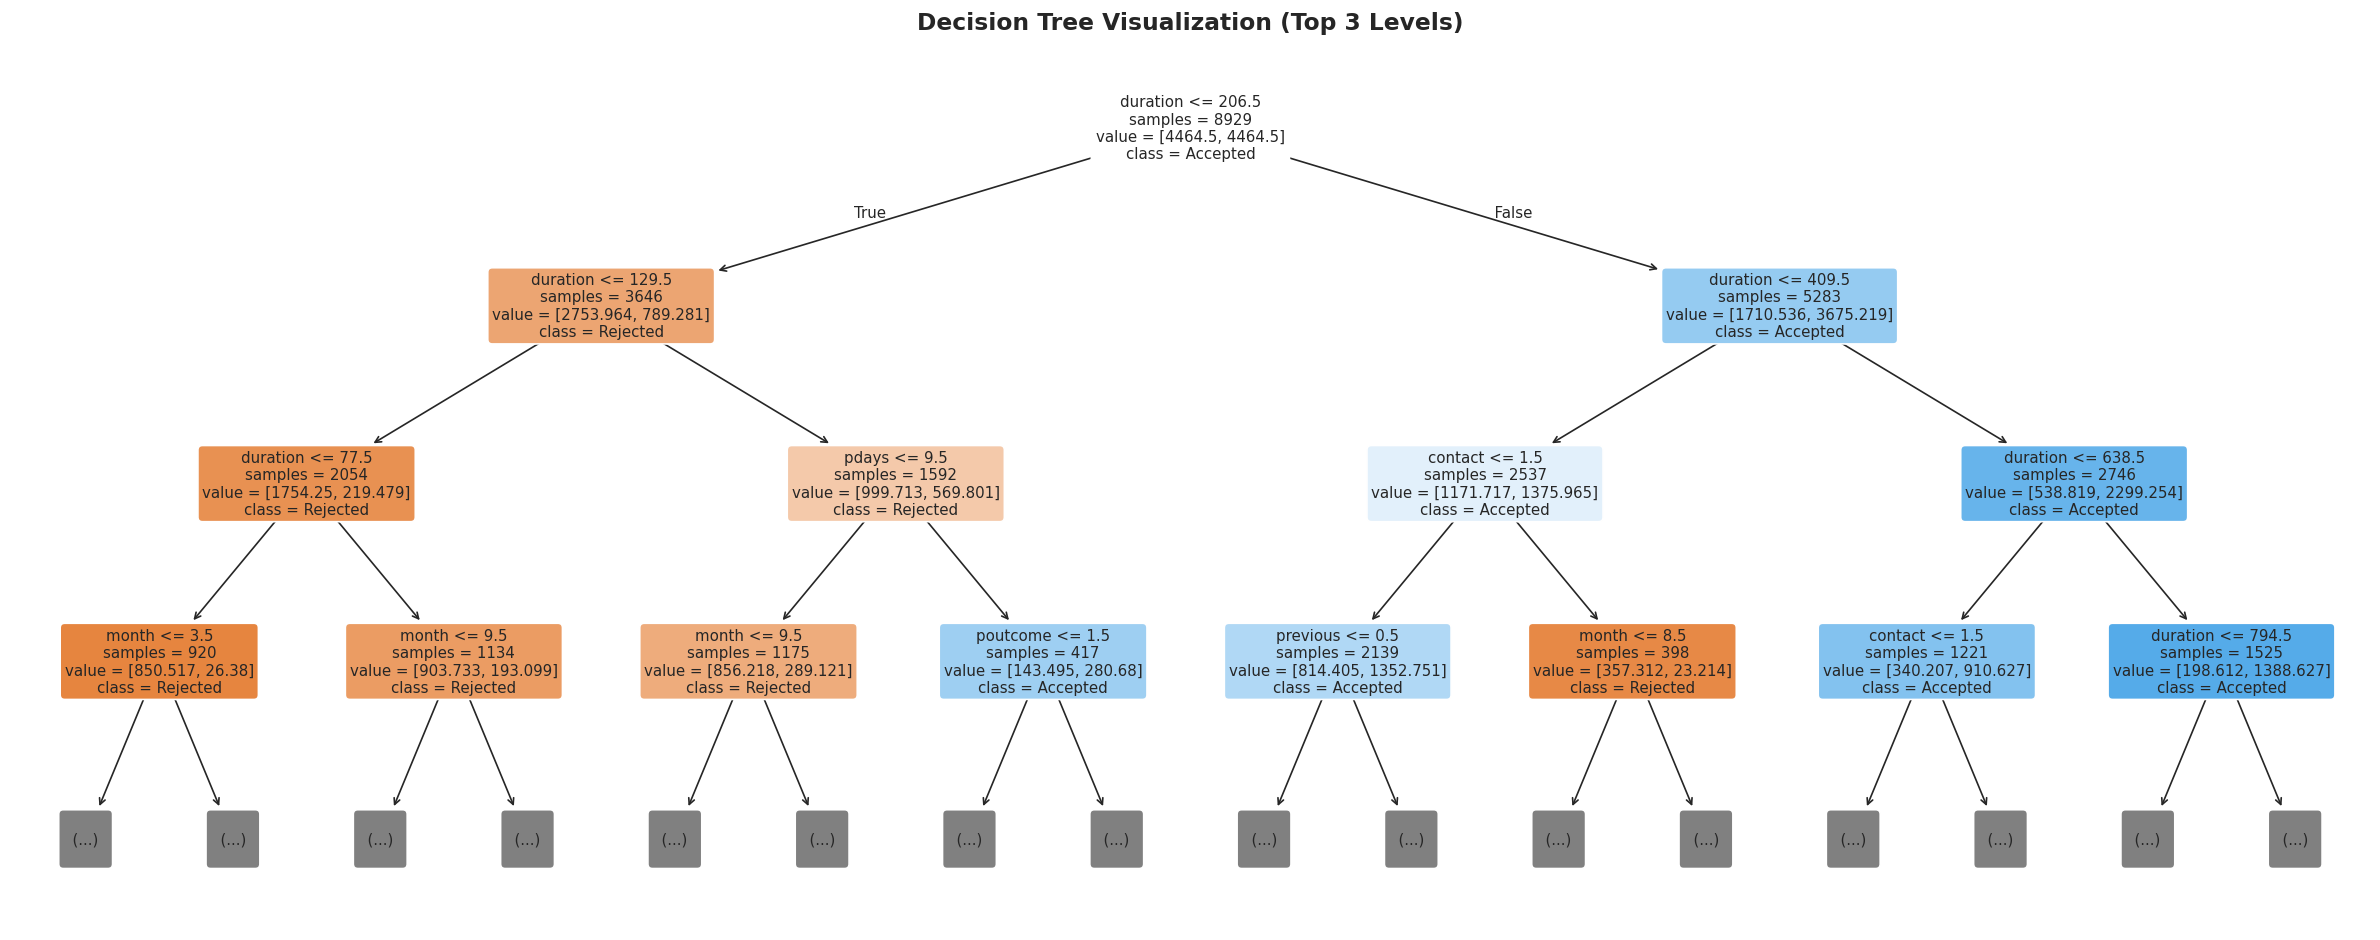

In [20]:
# --- Visualize the Decision Tree (top 3 levels) ---
plt.figure(figsize=(20, 8))
plot_tree(
    dt_model,
    feature_names=X.columns.tolist(),
    class_names=['Rejected', 'Accepted'],
    filled=True,
    max_depth=3,       # show top 3 levels only for readability
    fontsize=9,
    rounded=True,
    impurity=False
)
plt.title('Decision Tree Visualization (Top 3 Levels)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [21]:
# --- Business Insight: Acceptance Rate by Top Customer Groups ---

# Acceptance rate by job
job_acceptance = df.groupby('job')['deposit'].apply(
    lambda x: round((x == 'yes').mean() * 100, 1)
).reset_index()
job_acceptance.columns = ['Job', 'Acceptance Rate (%)']
job_acceptance = job_acceptance.sort_values('Acceptance Rate (%)', ascending=False)

print('Loan Acceptance Rate by Job Type:')
print(job_acceptance.to_string(index=False))

print('\n')

# Acceptance rate by marital status
marital_acceptance = df.groupby('marital')['deposit'].apply(
    lambda x: round((x == 'yes').mean() * 100, 1)
).reset_index()
marital_acceptance.columns = ['Marital Status', 'Acceptance Rate (%)']
marital_acceptance = marital_acceptance.sort_values('Acceptance Rate (%)', ascending=False)

print('Loan Acceptance Rate by Marital Status:')
print(marital_acceptance.to_string(index=False))

Loan Acceptance Rate by Job Type:
          Job  Acceptance Rate (%)
      student                 74.7
      retired                 66.3
   unemployed                 56.6
   management                 50.7
      unknown                 48.6
       admin.                 47.3
self-employed                 46.2
   technician                 46.1
     services                 40.0
    housemaid                 39.8
 entrepreneur                 37.5
  blue-collar                 36.4


Loan Acceptance Rate by Marital Status:
Marital Status  Acceptance Rate (%)
        single                 54.3
      divorced                 48.1
       married                 43.4


---
## 10. Conclusion

### Key Findings

**Model Performance:**
- The Decision Tree Classifier achieved solid accuracy on the test set.
- The confusion matrix shows the model can effectively identify customers likely to accept a loan offer.
- The tree visualization provides transparent, explainable decision rules — a major advantage over black-box models.

**Top Factors Influencing Loan Acceptance:**
- **Duration** (last contact duration) — longer calls strongly correlate with acceptance; customers who engage more are more likely to convert.
- **Balance** — customers with higher account balances are more receptive to loan offers.
- **Age** — younger customers (especially students) and older customers (retired) tend to accept more.
- **Job type** — students and retired individuals show the highest acceptance rates.
- **Previous campaign outcome** — customers who responded positively before are much more likely to accept again.

**Business Recommendations:**
- Prioritize outreach to students and retired customers — they have the highest conversion rates.
- Focus on customers with higher balances as they are more financially receptive.
- Train agents to extend call duration meaningfully — longer, quality conversations drive acceptance.
- Re-target customers who accepted offers in previous campaigns first.
- Single/divorced customers show slightly higher acceptance than married ones — consider targeted campaigns.

**Skills Demonstrated:**
- Data exploration and visualization
- Categorical encoding using Label Encoding
- Decision Tree classification model training
- Model evaluation with accuracy, confusion matrix, and classification report
- Feature importance analysis
- Business insight extraction from model results